# Chuyên đề chọn lọc trong hệ thống thông tin

MSSV: 19120261
Họ và tên: Nguyễn Hữu Khôi

# Chuẩn bị dữ liệu

In [1]:
%pip install pandas;
%pip install scipy;
%pip install seaborn;
%pip install scikit-learn;

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [125]:
# Data processing
import pandas as pd
import numpy as np
import scipy.stats

# Visualization
import seaborn as sns

# Similarity
from sklearn.metrics.pairwise import cosine_similarity

Đọc dataset rating của người dùng từ file

In [202]:
# Read in data
ratings=pd.read_csv('BX-CSV-Dump\BX-Book-ratings.csv', encoding = 'unicode_escape', sep = ';')

# Take a look at the data
print(ratings.head())
print(ratings.info())

   User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB
None


Data có 3 cột: User-ID, ISBN, Book-Rating

Data có 1149780 dòng, không có missing data

In [203]:
# Number of users
print('The ratings dataset has', ratings['User-ID'].nunique(), 'unique users')

# Number of movies
print('The ratings dataset has', ratings['ISBN'].nunique(), 'unique books')

# Number of ratings
print('The ratings dataset has', ratings['Book-Rating'].nunique(), 'unique ratings')

# List of unique ratings
print('The unique ratings are', sorted(ratings['Book-Rating'].unique()))

The ratings dataset has 105283 unique users
The ratings dataset has 340556 unique books
The ratings dataset has 11 unique ratings
The unique ratings are [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


Đọc dataset thông tin tựa sách từ file

Dataset thông tin sách có các cột: ISBN, Book-Title, Book-Author, Year-Of-Publication, Publisher, Image-URL-S, Image-URL-M, Image-URL-L

Nhận thấy trong dataset có sẵn xuất hiện một số dòng bị lỗi khi đọc từ csv, thêm parameter on_bad_line='skip' để bỏ qua các dòng lỗi

In [197]:

import csv
colname = ["ISBN","Book-Title","Book-Author","Year-Of-Publication","Publisher","Image-URL-S","Image-URL-M","Image-URL-L"]
books = pd.read_csv('BX-CSV-Dump/BX-Books.csv', encoding = 'unicode_escape', delimiter=';', quotechar='"',on_bad_lines='skip')
#books = pd.read_csv('BX-CSV-Dump/test.csv', encoding = 'unicode_escape', sep = '";"')

books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271356 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


C:\Users\K\AppData\Local\Temp\ipykernel_16516\3860713377.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('BX-CSV-Dump/BX-Books.csv', encoding = 'unicode_escape', delimiter=';', quotechar='"',on_bad_lines='skip')


Kiểm tra lại số dòng lỗi có đáng kể hay không, kết quả ra được số dòng lỗi chỉ chiếm 0.007%, có thể bỏ qua các dòng này.

In [198]:
with open("BX-CSV-Dump/BX-Books.csv") as f:
    len_csv = sum(1 for line in f)

bad_rows_rate = (len_csv-len(books))/len_csv*100
print(bad_rows_rate)

0.007369739848183359


Join 2 dataset với nhau

In [204]:
# Merge ratings and movies datasets
df = pd.merge(ratings, books, on='ISBN', how='inner')

# Take a look at the data
df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


Dataset BX-Users.csv

In [213]:
users_df = pd.read_csv('BX-CSV-Dump/BX-Users.csv', encoding = 'unicode_escape', delimiter=';', quotechar='"')

In [214]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [210]:
# Aggregate by book
agg_ratings = df.groupby('Book-Title').agg(mean_rating = ('Book-Rating', 'mean'),
                                                number_of_ratings = ('Book-Rating', 'count')).reset_index()                          

Dùng biểu đồ jointplot để kiểm tra độ tương quan giữa rating trung bình và số lượng rating của mỗi tựa sách

Biểu đồ cho thấy hầu hết các tựa sách được đánh giá vào khoảng 2 đến 4, trung bình số lần được đánh giá nằm vào khoảng dưới 800

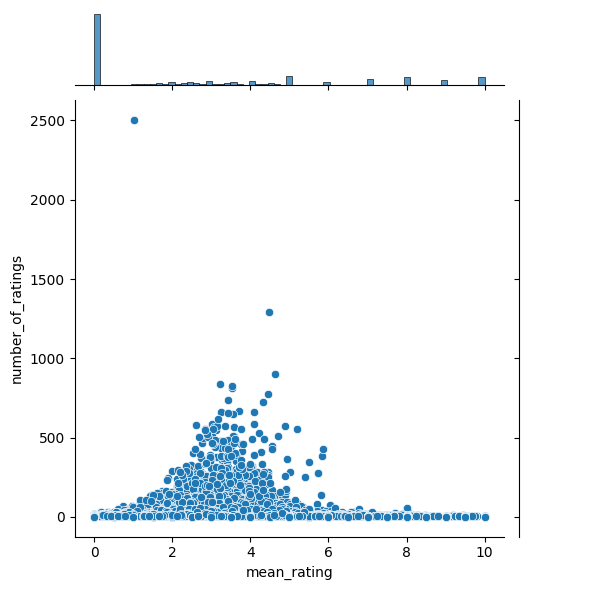

In [211]:
# Visulization
sns.jointplot(x='mean_rating', y='number_of_ratings', data=agg_ratings)

Biểu đồ đánh giá sự tương quan giữa số lượng sách đã đánh giá và đánh giá trung bình của mỗi người dùng

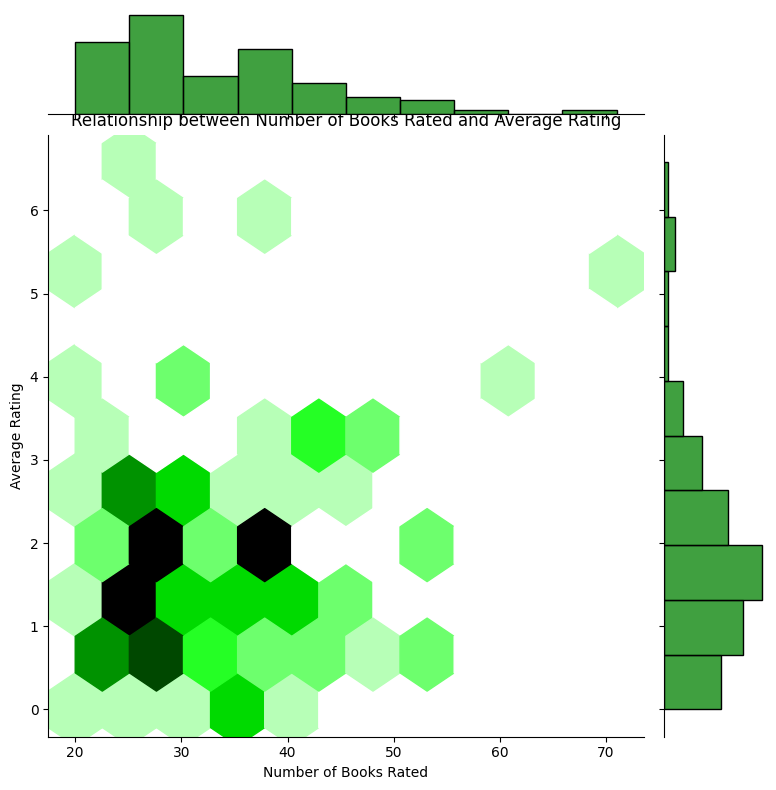

In [216]:
import seaborn as sns

# Calculate the number of books rated by each user
num_books_rated = train_df.groupby('User-ID')['Book-Rating'].count()

# Calculate the average rating for each user
average_rating = train_df.groupby('User-ID')['Book-Rating'].mean()

# Create a jointplot
sns.jointplot(x=num_books_rated, y=average_rating, kind='hex', height=8, color='g')

# Set the axis labels and title
plt.xlabel('Number of Books Rated')
plt.ylabel('Average Rating')
plt.title('Relationship between Number of Books Rated and Average Rating')

# Display the plot
plt.show()


Tìm kiếm outlier trong tập dữ liệu

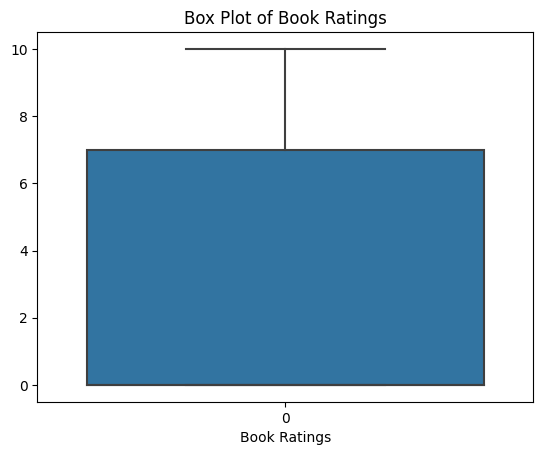

In [217]:
import seaborn as sns

# Define the column containing the data
column_data = df['Book-Rating']

# Create a box plot
sns.boxplot(data=column_data)

# Set plot title and labels
plt.title("Box Plot of Book Ratings")
plt.xlabel("Book Ratings")

# Show the plot
plt.show()


# Tính similarity của các user bằng Pearson

Tạo ma trận đánh giá, với index là User-ID, các cột là các tựa sách. Nếu sách chưa được đánh giá bởi 1 user, vị trí đó sẽ có giá trị NaN

In [ ]:
# Create user-item matrix
user_matrix = df_GT100.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating')
user_matrix.info()

Với mỗi người dùng có một cách đánh giá khác nhau, ta phải triệt tiêu bias bằng cách trừ đi số điểm trung bình mỗi user đánh giá cho các tựa sách

In [ ]:
# Normalize user-item matrix
user_matrix_norm = user_matrix.subtract(user_matrix.mean(axis=1), axis = 'rows')
user_matrix_norm.head()

Tính similarity bằng pearson

In [ ]:
# User similarity matrix using Pearson correlation
user_similarity = user_matrix_norm.T.corr()
user_similarity.head()

# Tính similarity của user bằng jaccard

Vì hàm jaccard_score không thể vector hoá, chúng ta phải sử dụng vòng lặp để thực hiện tính độ tương đồng giữa các user. Thay vào đó, sử dụng pairwise_distance có thể tính được độ khác biệt giữa các user và vector hoá nó, rồi lấy hiệu số của 1 và kết quả, ta có được độ tương đồng jaccard.

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

jac_sim = 1 - pairwise_distances(user_matrix_norm.T.to_numpy(), metric='jaccard')
user_jac_sim_df = pd.DataFrame(
    1 - pairwise_distances(user_matrix_norm.T.to_numpy(), metric='jaccard'), 
    index=user_matrix_norm.columns, columns=user_matrix_norm.columns,
)

In [ ]:
user_jac_sim_df.head()

# Tính similarity của các item bằng Pearson

Tạo ma trận đánh giá, với index là Tựa sách, các cột là các User-ID. Nếu sách chưa được đánh giá bởi 1 user, vị trí đó sẽ có giá trị NaN

In [ ]:
# Create user-item matrix
item_matrix = df_GT100.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')
item_matrix.info()

Triệt tiêu bias bằng cách trừ đi giá trị trung bình trên đánh giá của mỗi tựa sách

In [ ]:
# Normalize user-item matrix
item_matrix_norm = item_matrix.subtract(item_matrix.mean(axis=1), axis = 'rows')
item_matrix_norm.head()

Tính similarity bằng pearson

In [ ]:
# User similarity matrix using Pearson correlation
item_similarity = item_matrix_norm.T.corr()
item_similarity.head()

# Tính độ tương đồng của các item bằng Jaccard

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

jac_sim = 1 - pairwise_distances(item_matrix_norm.T.to_numpy(), metric='jaccard')
item_jac_sim_df = pd.DataFrame(
    1 - pairwise_distances(item_matrix_norm.T.to_numpy(), metric='jaccard'), 
    index=item_matrix_norm.columns, columns=item_matrix_norm.columns,
)

In [ ]:
item_jac_sim_df.head()

# Thay vì sử dụng các hàm có sẵn, chúng ta tự xây dựng hàm theo công thức đã cho

Tính độ tương đồng giữa 2 user bằng pearson

In [3]:
def calculate_pcc_similarity(user_ratings_x, user_ratings_y):
    #chọn ra các items đều được đánh giá bởi 2 user
    common_items = set(user_ratings_x['ISBN']).intersection(set(user_ratings_y['ISBN']))
    #nếu danh sách item chung không có tựa sách nào, trả về kết quả 0
    if len(common_items) == 0:
        return 0.0
    # số điểm đánh giá của 2 user với mỗi item trong danh sách item chung
    ratings_x = user_ratings_x[user_ratings_x['ISBN'].isin(common_items)]['Book-Rating'].to_numpy()
    ratings_y = user_ratings_y[user_ratings_y['ISBN'].isin(common_items)]['Book-Rating'].to_numpy()
    book_ratings_x = ratings_x[np.char.isdigit(ratings_x.astype(str))]
    book_ratings_y = ratings_y[np.char.isdigit(ratings_y.astype(str))] 
    book_ratings_x = book_ratings_x.astype(float)
    book_ratings_y = book_ratings_y.astype(float)
    #điểm đánh giá trung bình của mỗi user để reduce bias
    avg_rating_x = np.mean(book_ratings_x)
    avg_rating_y = np.mean(book_ratings_y)
    #tử số của công thức pearson
    numerator = np.sum((book_ratings_x - avg_rating_x) * (book_ratings_y - avg_rating_y))
    #mẫu số của công thức pearson
    denominator = np.sqrt(np.sum((book_ratings_x - avg_rating_x) ** 2) * np.sum((book_ratings_y - avg_rating_y) ** 2))

    if denominator == 0:
        return 0.0

    pcc_similarity = numerator / denominator
    return pcc_similarity


Xây dựng hàm tư vấn

In [218]:
def generate_user_based_recommendations(user_id, data, similarity_matrix, k, top_n):
   # Đánh giá của người dùng
    user_ratings = data[data['User-ID'] == int(user_id)]

# Lấy độ đo tương đồng của các người dùng khác đối với người dùng cần tư vấn
    similarity_scores = similarity_matrix[user_id]

# Lưu độ đo thành dataframe
    sim_df = similarity_scores.reset_index()
    sim_df.columns = ['other_user_id', 'similarity_score']

# Sắp xếp giảm dần theo độ đo
    sorted_sim_df = sim_df.sort_values(by='similarity_score', ascending=False)

 # chọn ra k người dùng có độ tương đồng cao nhất
    top_sim_df = sorted_sim_df.head(k)

  # Tính dự đoán đánh giá
    predicted_ratings = {}
    for index, row in top_sim_df.iterrows():
        other_user_id = row['other_user_id']
        similarity = row['similarity_score']

        # Với mỗi người dùng tham gia, lọc ra các đánh giá của người dùng đó
        other_user_ratings = data[data['User-ID'] == other_user_id]

        for _, book_row in other_user_ratings.iterrows():
            item_id = book_row['ISBN']
            rating = book_row['Book-Rating']

            # Chỉ quan tâm đến những tựa sách chưa được đánh giá bởi người dùng cần tư vấn
            if item_id not in user_ratings['ISBN'].values:
                if item_id not in predicted_ratings:
                    predicted_ratings[item_id] = {
                        'numerator': 0, 'denominator': 0}

                # Tính tử số và mẫu số của công thức
                predicted_ratings[item_id]['numerator'] += similarity * \
                    (rating - other_user_ratings['Book-Rating'].mean())
                predicted_ratings[item_id]['denominator'] += similarity               

    # Tính dự đoán đánh giá
    predicted_ratings_values = {}
    for item_id, values in predicted_ratings.items():
        
        predicted_ratings_values[item_id] = user_ratings['Book-Rating'].mean(
        ) + values['numerator'] / values['denominator']

    # Sắp xếp dự đoán theo thứ tự giảm dần
    sorted_predicted_ratings = sorted(
        predicted_ratings_values.items(), key=lambda x: x[1], reverse=True)

    # chọn ra top_n các tựa sách được dự đoán đánh giá cao nhất
    top_predicted_ratings = sorted_predicted_ratings[:top_n]

    # Tạo danh sách tư vấn
    recommendations = []
    for item_id, predicted_rating in top_predicted_ratings:
        recommendations.append((item_id, predicted_rating))
    return recommendations, predicted_ratings_values


Vì thuật toán user-based không thuận tiện cho người dùng mới cũng như các item mới, để thuận tiện hơn cho quá trình tìm hiểu cũng như giảm tải cho hệ thống, em quyết định thu nhỏ dữ liệu và chọn ra top 100 người dùng đã đánh giá nhiều tựa sách nhất. 

In [12]:
data = pd.read_csv('top_ratings.csv')
top_user_ids = data['User-ID'].value_counts().nlargest(100).index

# Filter the data for the top User-IDs
top_user_ratings = data[data['User-ID'].isin(top_user_ids)]

# Get the top 100 ISBNs with the most book ratings
top_isbns = top_user_ratings['ISBN'].value_counts().nlargest(100).index

# Filter the data for the top ISBNs
top_isbn_ratings = top_user_ratings[top_user_ratings['ISBN'].isin(top_isbns)]

# Save the filtered data to a new DataFrame
top_ratings = top_isbn_ratings[['User-ID', 'ISBN', 'Book-Rating']]

# Save the new DataFrame to a CSV file
top_ratings.to_csv('top_ratings.csv', index=False)

print("Top 100 User-IDs with the most book ratings data saved to 'top_ratings.csv'.")


Top 100 User-IDs with the most book ratings data saved to 'top_ratings.csv'.


Tính độ tương đồng giữa các người dùng và lưu vào file similarity_matrix.csv

In [ ]:
import pandas as pd
import numpy as np

# Tính độ tương đồng giữa mỗi cặp người dùng
user_ids = data['User-ID'].unique()
num_users = len(user_ids)
similarity_matrix = np.zeros((num_users, num_users))

for i in range(num_users):
    user_ratings_x = data[data['User-ID'] == user_ids[i]]
    for j in range(i + 1, num_users):
        user_ratings_y = data[data['User-ID'] == user_ids[j]]
        similarity = calculate_pcc_similarity(user_ratings_x, user_ratings_y)
        similarity_matrix[i, j] = similarity
        similarity_matrix[j, i] = similarity
        
        # Track progress
        progress = (i * (num_users - 1) + j - i - 1) / ((num_users - 1) * num_users / 2) * 100
        print(f"Progress: {progress:.2f}%")

# Save the similarity matrix to a file
np.savetxt('similarity_matrix.csv', similarity_matrix, delimiter=',')

print("Similarity matrix calculation completed and saved to 'similarity_matrix.csv'.")


In [147]:
similarity_matrix = pd.read_csv('similarity_matrix_2.csv', index_col=0)
data = pd.read_csv('top_ratings.csv')
user_id="6251"
k=5
top_n = 10
recommendations, predicted_ratings = generate_user_based_recommendations(user_id, data, similarity_matrix, k, top_n)

# Print the recommendations
print(f"Recommendations for User {user_id}:")
for item_id, predicted_rating in recommendations:
    print(f"Item ID: {item_id}, Predicted Rating: {predicted_rating}")
    



Recommendations for User 6251:
Item ID: 0316769487, Predicted Rating: 10.744949494949495
Item ID: 0345443284, Predicted Rating: 8.629870129870131
Item ID: 014028009X, Predicted Rating: 7.681813091078126
Item ID: 0385722206, Predicted Rating: 7.62987012987013
Item ID: 0440211727, Predicted Rating: 5.673670958826555
Item ID: 0446605239, Predicted Rating: 5.525786781540829
Item ID: 0316096199, Predicted Rating: 5.070881718825678
Item ID: 0446610038, Predicted Rating: 5.070881718825678
Item ID: 0316776963, Predicted Rating: 4.646843727925242
Item ID: 0345339681, Predicted Rating: 4.592604384893802


Kiểm tra dự đoán bằng RMSE

In [224]:
from sklearn.metrics import mean_squared_error
import numpy as np

shuffled_df = data.sample(frac=1, random_state=12)

# Chia dataset thành 2 phần 
train_df = shuffled_df.sample(frac=0.8, random_state=42)
test_df = shuffled_df.drop(train_df.index)
k = 5
top_n = len(train_df['ISBN'].unique())
# Danh sách người dùng trong tập train
train_user_ids = train_df['User-ID'].unique()

# Danh sách người dùng trong tập test
test_user_ids = test_df['User-ID'].unique()
rmse_values = []
actual_ratings_list = []
predicted_ratings_list = []

for user_id in test_user_ids:
    if user_id in train_user_ids:
        # Tính toán dự đoán 
        recommendations, predicted_ratings_values = generate_user_based_recommendations(str(user_id), train_df, similarity_matrix, k, top_n)
        
        # Dự đoán thực tế trong tập test
        actual_ratings = test_df[test_df['User-ID'] == user_id][['ISBN', 'Book-Rating']].values
        
        # Lấy danh sách mã sách trong tập test
        item_ids = actual_ratings[:, 0]
        
        # Lấy dự đoán đối với mỗi mã sách trong tập test sau khi tính toán
        predicted_ratings = [predicted_ratings_values.get(item_id, 0) for item_id in item_ids]
        
        # Bỏ qua missing value bằng cách thay bằng số 0
        actual_ratings = np.nan_to_num(actual_ratings[:, 1])
        predicted_ratings = np.nan_to_num(predicted_ratings)
        
        # Tính RMSE cho mỗi user
        rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))
        rmse_values.append(rmse)

        # Lưu lại đánh giá của tập test và tập dự đoán
        actual_ratings_list.extend(actual_ratings)
        predicted_ratings_list.extend(predicted_ratings)

# Tính RMSE trung bình
average_rmse = np.mean(rmse_values)


C:\Users\K\AppData\Local\Temp\ipykernel_16516\4164382352.py:47: RuntimeWarning: invalid value encountered in scalar divide
  ) + values['numerator'] / values['denominator']
C:\Users\K\AppData\Local\Temp\ipykernel_16516\4164382352.py:47: RuntimeWarning: invalid value encountered in scalar divide
  ) + values['numerator'] / values['denominator']
C:\Users\K\AppData\Local\Temp\ipykernel_16516\4164382352.py:47: RuntimeWarning: invalid value encountered in scalar divide
  ) + values['numerator'] / values['denominator']


In [225]:
print(average_rmse)

2.5458521284082236


Độ lệch trung bình cho dự đoán là 2.54


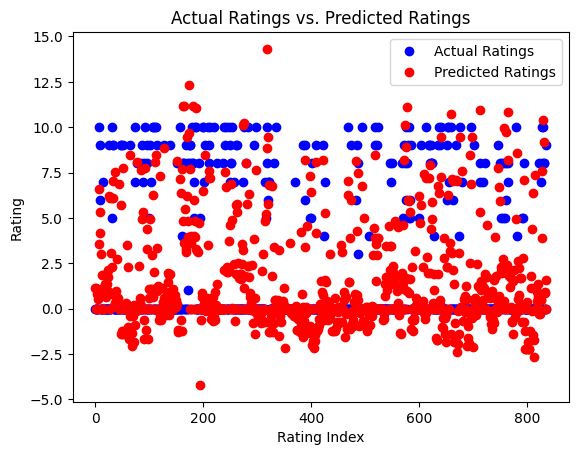

In [226]:
import matplotlib.pyplot as plt

# Create a list of indices for x-axis
indices = range(len(actual_ratings_list))

# Plot the actual ratings
plt.plot(indices, actual_ratings_list, 'bo', label='Actual Ratings')

# Plot the predicted ratings
plt.plot(indices, predicted_ratings_list, 'ro', label='Predicted Ratings')

# Set the labels and title
plt.xlabel('Rating Index')
plt.ylabel('Rating')
plt.title('Actual Ratings vs. Predicted Ratings')

# Add a legend
plt.legend()

# Show the plot
plt.show()